In [ ]:
#importing required libraries, throughout the process, we will use Hugging Face Transformers with TensorFlow.

In [4]:
!mkdir input
!mv 'SPAM text message 20170820 - Data.csv' input/

mv: cannot stat 'SPAM text message 20170820 - Data.csv': No such file or directory


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 9.2 MB/s eta 0:00:00


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/input'):
    
    for filename in filenames:
        print(os.path.join(dirname, filename))

        

import matplotlib.pyplot as plt
import tensorflow as tf
import transformers

/content/input/SPAM text message 20170820 - Data.csv


In [6]:
df = pd.read_csv("/content/input/SPAM text message 20170820 - Data.csv")

In [7]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [10]:
df['Category']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [11]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

<Axes: >

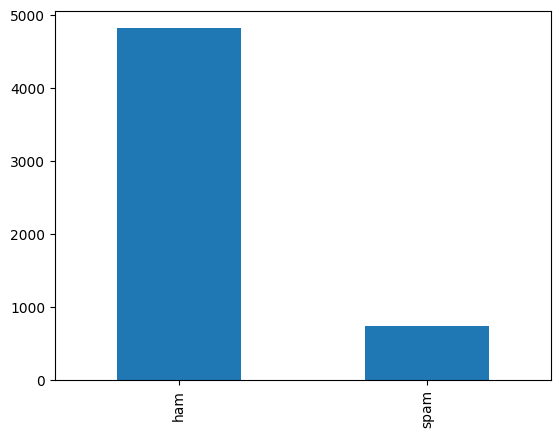

In [12]:
df['Category'].value_counts().plot(kind='bar')

In [13]:
df['Category'] = pd.get_dummies(df['Category'], drop_first=True)

In [14]:
pred_dict = {0: "Ham", 1: "Spam"}

In [15]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Defining our feature and label values as well as we are converting them to a list, since Transformer tokenizer accepts them as a list.

In [17]:
X=df['Message']
y=df['Category']

In [18]:
X = list(X)
y = list(y)

In [19]:
#Train test split with Sci-kit learn

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#Importing tokenizer and model, and tokenizing our values. In this case we are using smaller version of BERT, which is DistilBERT.
#You can use any model you want. However you need to choose same tokenizer with the model

In [22]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam

In [23]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
tokenized_train_data = tokenizer(X_train, return_tensors="np", padding=True)
tokenized_test_data = tokenizer(X_test, return_tensors="np", padding=True)
labels = np.array(y_train) 

In [24]:
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased")

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'dropout_19', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [25]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer=Adam(3e-5), metrics=['accuracy'])

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [27]:
history = model.fit(dict(tokenized_train_data), labels, batch_size=16, epochs=2, shuffle=True)

Epoch 1/2
279/279 [==============================] - 150s 399ms/step - loss: 0.0833 - accuracy: 0.9733
Epoch 2/2
279/279 [==============================] - 104s 372ms/step - loss: 0.0287 - accuracy: 0.9921


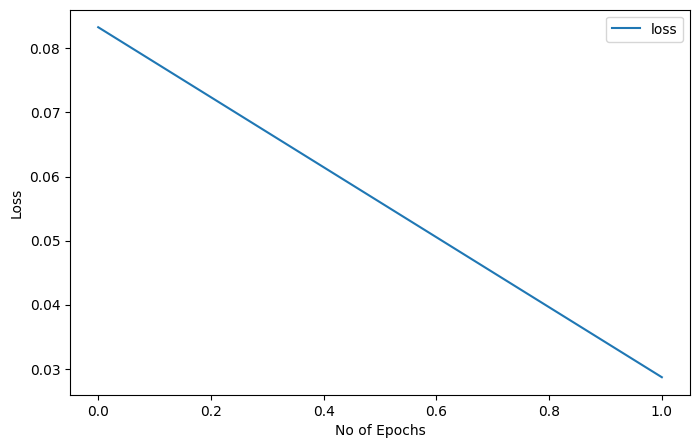

In [28]:
pd.DataFrame(history.history['loss']).plot(figsize=(8,5))
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend(['loss'])
plt.show()

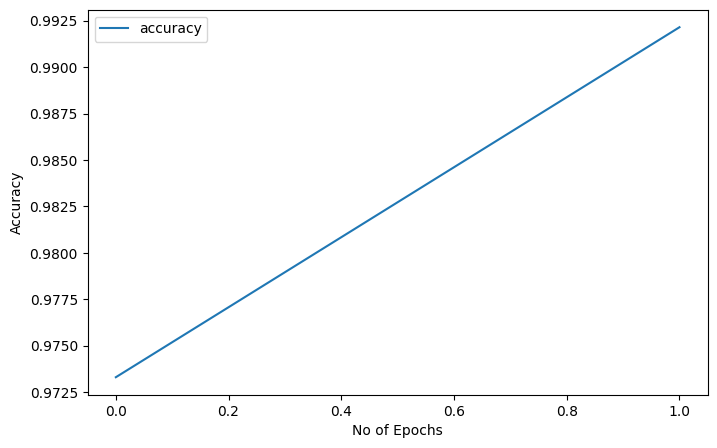

In [29]:
pd.DataFrame(history.history['accuracy']).plot(figsize=(8,5))
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend(['accuracy'])
plt.show()

In [30]:
dict(tokenized_train_data)

{'input_ids': array([[  101,  7514,  2000, ...,     0,     0,     0],
        [  101,  7592,  1012, ...,     0,     0,     0],
        [  101,  2129,  2272, ...,     0,     0,     0],
        ...,
        [  101, 10975,  7875, ...,     0,     0,     0],
        [  101, 23961, 16644, ...,     0,     0,     0],
        [  101,  2106,  2002, ...,     0,     0,     0]]),
 'attention_mask': array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]])}

In [31]:
#Predicting our values

In [32]:
y_pred = model.predict(dict(tokenized_test_data))

35/35 [==============================] - 7s 147ms/step


In [33]:
y_pred

TFSequenceClassifierOutput(loss=None, logits=array([[ 3.8270385, -3.2361352],
       [ 3.8305407, -3.2949975],
       [ 3.8919847, -3.3108304],
       ...,
       [ 3.9429102, -3.3218734],
       [ 3.5944319, -3.1236355],
       [ 3.1055758, -2.7085674]], dtype=float32), hidden_states=None, attentions=None)

In [34]:
#Converting our values intoı 0 and 1 labels

In [35]:
logits = y_pred.logits
softmax = tf.nn.softmax(logits)
predictions = np.argmax(softmax.numpy(), axis=1)

In [36]:
y_test = np.array(y_test)

In [37]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
#Evaluating our results

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predictions)
cr = classification_report(y_test, predictions)


print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

Confusion Matrix:
 [[957   9]
 [  6 143]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.96      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



<Axes: >

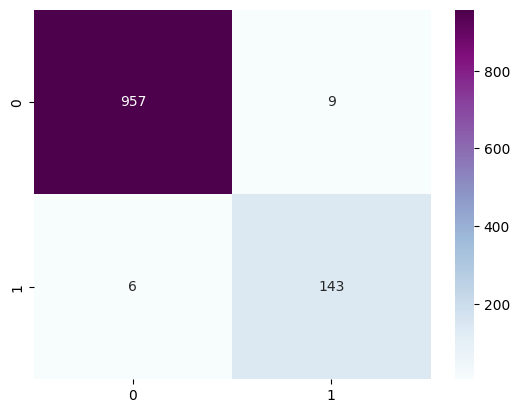

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')

## Unseen Data Test

In [42]:
def run(input: str):
  tokenized_irl = tokenizer([input], return_tensors="np", padding=True)
  y_irl = model.predict(dict(tokenized_irl))
  new_logits = y_irl.logits
  new_softmax = tf.nn.softmax(new_logits)
  new_predictions = np.argmax(new_softmax.numpy(), axis=1)
  print("Input: ", input)
  print("Prediction: ", pred_dict[new_predictions[0]])


In [43]:
run("Hi I am Jarvis")

1/1 [==============================] - 2s 2s/step
Input:  Hi I am Jarvis
Prediction:  Ham


In [46]:
run("Special Offer for you from bank")

1/1 [==============================] - 0s 50ms/step
Input:  Special Offer for you from bank
Prediction:  Spam
